# Intro to Programming for Data Science

geshun

In [ ]:
reticulate::use_condaenv("base")

##### Import pandas

Include `numpy` and `matplotlib`, we may use them down the line.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

##### Open and read files using vanilla python

> File name is `alpha-12-Sep-2022 21-28-50.csv`

In [ ]:
with open("alpha-12-Sep-2022 21-28-50.csv", "r") as f:
  transaction = f.read()

transaction

'transaction_id,transaction_date,transaction_type,transaction_category,transaction_item,transaction_total_cost,transaction_quantity,transaction_unit_price,transaction_source,transaction_measure_unit,transaction_remark\n0000018.2020410.SS.Gen.120,2020-04-10,Sell Services,Equipment (or Tool),Generator, 120 ,6, 20 ,Other,Hourly,\n0000017.2020225.BG.Gra.120,2020-02-25,Buy Goods,Herbicide (or Weedicide),Gramoxone, 120 ,1, 120 ,uuni0004v   Unity Agro Chemicals,Bottle,\n0000016.2020525.SG.Oth.500,2020-05-25,Sell Goods,Inserticide (or Pesticide),Other, 500 ,5, 100 ,Other,Bottle,\n0000015.2020525.BG.cchChiPep.300,2020-05-25,Buy Goods,Seedling (or Plant Material),cchi0004p   Chili Pepper, 300 ,3, 100 ,aalp0001v   Alpha Ventures,Sachet,\n0000014.2020525.BG.Pet.200,2020-05-25,Buy Goods,Fuel (or Oil),Petro, 200 ,10, 20 ,Other,Gallon,Getting expensive\n0000013.2020524.BS.Goo.200,2020-05-24,Buy Services,Other,Goodwill, 200 ,1, 200 ,Other,Other,Goodwill (gift) to a friend of the farm\n0000012.2020316.

We see that a lot of work needs to be done on `transaction` string
object if we want to get it into tabular/rectangular form or preprocess
so that numeric fields are actually numeric.

> We can attempt to read the `.csv` file using the `csv` package which
> comes with standard python.

In [ ]:
import csv
with open("alpha-12-Sep-2022 21-28-50.csv", "r") as file:
  trans = csv.reader(file)
  for line in trans:
    print(line)

['transaction_id', 'transaction_date', 'transaction_type', 'transaction_category', 'transaction_item', 'transaction_total_cost', 'transaction_quantity', 'transaction_unit_price', 'transaction_source', 'transaction_measure_unit', 'transaction_remark']
['0000018.2020410.SS.Gen.120', '2020-04-10', 'Sell Services', 'Equipment (or Tool)', 'Generator', ' 120 ', '6', ' 20 ', 'Other', 'Hourly', '']
['0000017.2020225.BG.Gra.120', '2020-02-25', 'Buy Goods', 'Herbicide (or Weedicide)', 'Gramoxone', ' 120 ', '1', ' 120 ', 'uuni0004v   Unity Agro Chemicals', 'Bottle', '']
['0000016.2020525.SG.Oth.500', '2020-05-25', 'Sell Goods', 'Inserticide (or Pesticide)', 'Other', ' 500 ', '5', ' 100 ', 'Other', 'Bottle', '']
['0000015.2020525.BG.cchChiPep.300', '2020-05-25', 'Buy Goods', 'Seedling (or Plant Material)', 'cchi0004p   Chili Pepper', ' 300 ', '3', ' 100 ', 'aalp0001v   Alpha Ventures', 'Sachet', '']
['0000014.2020525.BG.Pet.200', '2020-05-25', 'Buy Goods', 'Fuel (or Oil)', 'Petro', ' 200 ', '10', 

> This will be great if the idea is to process the file line (row) by
> line.

##### Read file using Pandas

In [ ]:
df = pd.read_csv("alpha-12-Sep-2022 21-28-50.csv")

File can be read directly from github.

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/geshun/analytics-group/main/weeks/5/alpha-12-Sep-2022%2021-28-50.csv")

##### Get Info and summary about the data

The knowledge gained should be useful for processing the data for later
analysis.

In [ ]:
df.shape

(33, 11)

> `df.shape` Gives a sense of how many records (rows) or fields
> (columns) we are dealing with. Some data pre-processing can increase
> (or decrease) the number of fields or decrease the number of records
> (rows) - like dropping records with missing values.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   transaction_id            18 non-null     object 
 1   transaction_date          18 non-null     object 
 2   transaction_type          18 non-null     object 
 3   transaction_category      18 non-null     object 
 4   transaction_item          18 non-null     object 
 5   transaction_total_cost    18 non-null     object 
 6   transaction_quantity      10 non-null     float64
 7   transaction_unit_price    18 non-null     object 
 8   transaction_source        18 non-null     object 
 9   transaction_measure_unit  10 non-null     object 
 10  transaction_remark        2 non-null      object 
dtypes: float64(1), object(10)
memory usage: 3.0+ KB

> `df.info()` Makes us aware of the data types of our columns. Here, you
> should begin to find out if the data types produced by your
> `pd.read_csv()` are what you intend to work with as they are or change
> them. When the non-null count is not the same as the number of
> entries, we conceive the idea that `pd.read_csv()` read in some
> entries as `null`.

The information provided by `df.info()` method, can also be established
via the following:

In [ ]:
df.dtypes

transaction_id               object
transaction_date             object
transaction_type             object
transaction_category         object
transaction_item             object
transaction_total_cost       object
transaction_quantity        float64
transaction_unit_price       object
transaction_source           object
transaction_measure_unit     object
transaction_remark           object
dtype: object

In [ ]:
df.isnull().sum()

transaction_id              15
transaction_date            15
transaction_type            15
transaction_category        15
transaction_item            15
transaction_total_cost      15
transaction_quantity        23
transaction_unit_price      15
transaction_source          15
transaction_measure_unit    23
transaction_remark          31
dtype: int64

Another piece of check is duplicates and it can be done using
`duplicated()` method of a `DataFrame`. Can you try understanding what
caused the duplicates in the data?

In [ ]:
df.duplicated().sum()

14

> Before you drop duplicates (de-duplicate) or remove missing values,
> there is an important question one needs to address. What set of
> fields identify a unique record in your data? This is the idea of
> primary key in database terminology. In our case, only the
> `transaction_id` field is the unique record identifier. This field
> should always have a value (hence, can’t be null), however,
> `df.isnull().sum()` shows that it has null entries.

In [ ]:
df.dropna(subset=["transaction_id"], inplace=True)

*Can you explain why we did not just do `df.dropna()`? Also, what is the
significant of using `inplace=True`?*

If we had wanted to check whether an entire row in our `DataFrame` has
missing value, we could have done `df[df.isnull().all(axis=1)]`

Go ahead and check that we have less records (`18`) than we started with
(`33`). However, there are still missing values in our data.

In [ ]:
df.nunique()

transaction_id              18
transaction_date             9
transaction_type             4
transaction_category        10
transaction_item            10
transaction_total_cost      10
transaction_quantity         6
transaction_unit_price       7
transaction_source           8
transaction_measure_unit     8
transaction_remark           2
dtype: int64

> `df.nunique()` counts the number of unique entries in each column. One
> application of this information is to establish if some fields can be
> stored as `Category`. We normally convert an object field into a
> category if there are fixed entries. The `transaction_type` field for
> instance has no missing values and only `4` unique entries. You can
> know the entries by doing `df.transaction_type.unique()`

##### Create analytical dataset

We shall take a column and ask if it is in the form we want to work
with. Apart from the `transaction_quantity` column, all other was read
in as `object` type (`Pandas`’ (specifically `numpy`’s) way of saying
mixed data type and thus string.

In [ ]:
df["transaction_type"] = df["transaction_type"].astype("category")
df["transaction_type"] = pd.Categorical(df["transaction_type"])
df = df.astype({"transaction_type": "category"})

> Run any of the code above to cast the `transaction_type` column to
> categorical.

*In case we also wanted to cast the `transaction_category` column to
categorical, how would we have done that together with
`transaction_type`?*

In [ ]:
df["transaction_total_cost"].astype("float")

*The above code unsuccessfully attempts to cast the
`transaction_total_cost` as float. Do you understand the error message
produced? How will you deal with it?*

In [ ]:
df["transaction_total_cost"] = pd.to_numeric(df.transaction_total_cost.str.replace(",", ""))
# df["transaction_total_cost"] = df["transaction_total_cost"].str.replace(",", "").astype(float)

> Run any of the above code to cast `transaction_total_cost` as numeric.
> Realize that, I had to remove the comma in the text prior to casting.
> In `Pandas`, the `str` method grants us access to methods applicable
> to strings, and from there we can use the `replace()` method. Here, we
> are replacing comma `","` with empty string - nothing `""` when we do
> `replace(",", "")`.

If you want to look too exotic (which perhaps is unnecessary in this
case), you can consider this:
`df["transaction_total_cost"] = df["transaction_total_cost"].apply(lambda x: float(x.replace(",", "")))`.
It uses `lambda` or anonymous function via the `apply` method of a
`Series`.

In [ ]:
df["transaction_date"] = df["transaction_date"].astype("datetime64[ns]")
df["transaction_date"] = pd.to_datetime(df["transaction_date"])

> Run any of the above code to get the `transaction_date` field as
> datetime type.

*We could have converted the `transaction_date` field together with
`transaction_type`, can you work that out?*

There is something interesting about the `transaction_unit_price`
column. Try doing this and see if you will understand the error
produced: `pd.to_numeric(df.transaction_unit_price)` or
`df["transaction_unit_price"].astype(float)`

In [ ]:
df["transaction_unit_price"] = df["transaction_unit_price"].str.strip().apply(lambda x: float(x) if len(x) != 0 else np.nan)
df["transaction_unit_price"] = pd.to_numeric(df.transaction_unit_price, errors='coerce')

> Run any of the above code to convert `transaction_unit_price` to
> numeric.

In [ ]:
def to_float(x):
  try:
    return float(x)
  except ValueError:
    return np.nan

In [ ]:
df["transaction_unit_price"].apply(to_float)

0      20.0
1     120.0
2     100.0
3     100.0
4      20.0
5     200.0
6     220.0
7       NaN
8       NaN
9       NaN
10      NaN
11      NaN
12      NaN
13      NaN
14      NaN
15    100.0
16      NaN
17    500.0
Name: transaction_unit_price, dtype: float64

We can also decided to write a function and apply it. We wrote a
`to_float()` function and applied it. If you care about the list
comprehension we talked about during the early days of our meetups see
the immediate code below:

In [ ]:
[float(x.strip()) if x.strip().isnumeric() else np.nan for x in df.transaction_unit_price]

##### Compare your result with this: If after transforming your data, you get something similar, then things are getting interesting.

In [ ]:
from pandas import read_csv
from numpy import nan

url = "https://raw.githubusercontent.com/geshun/analytics-group/main/weeks/5/alpha-12-Sep-2022%2021-28-50.csv"

dt = read_csv(
  url,
  skipfooter=15,
  engine="python",
  dtype={
    "transaction_type": "category",
    "transaction_category": "category"
  },
  converters={
    "transaction_unit_price": lambda x: float(x) if len(x.strip()) != 0 else nan,
    "transaction_total_cost": lambda x: float(x.replace(",", "")) if len(x.strip()) != 0 else nan
  },
  parse_dates=["transaction_date"]
)

dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   transaction_id            18 non-null     object        
 1   transaction_date          18 non-null     datetime64[ns]
 2   transaction_type          18 non-null     category      
 3   transaction_category      18 non-null     category      
 4   transaction_item          18 non-null     object        
 5   transaction_total_cost    18 non-null     float64       
 6   transaction_quantity      10 non-null     float64       
 7   transaction_unit_price    9 non-null      float64       
 8   transaction_source        18 non-null     object        
 9   transaction_measure_unit  10 non-null     object        
 10  transaction_remark        2 non-null      object        
dtypes: category(2), datetime64[ns](1), float64(3), object(5)
memory usage: 2.0+ KB

##### Save dataset

In [ ]:
# df.to_csv("weeks/5/alpha.csv", index=False)

##### Gaining insight from data

First let’s keep the columns simple and remove the redundant prefix name
`transaction_`. We will also drop the last three columns
(`source, measure_unit, remark`) we will not need them.

In [ ]:
df.columns

Index(['transaction_id', 'transaction_date', 'transaction_type',
       'transaction_category', 'transaction_item', 'transaction_total_cost',
       'transaction_quantity', 'transaction_unit_price', 'transaction_source',
       'transaction_measure_unit', 'transaction_remark'],
      dtype='object')

In [ ]:
pd.set_option("display.max_columns", 6)
pd.set_option("display.width", 150)

*How many Purchases and Sales have we made according to the dataset?*

-   This is a segmentation question (dealing with groups) - transactions
    that are related to purchases and those related to sales.

-   A classic split-apply-combine approach to problem solving

-   Basic count of elements belonging to each group

We ask the following data specific questions:

1.  What field captures information about purchases and sales?

In [ ]:
df["type"].value_counts()

Buy Goods        8
Sell Goods       5
Buy Services     3
Sell Services    2
Name: type, dtype: int64

Buy Goods        44.444444
Sell Goods       27.777778
Buy Services     16.666667
Sell Services    11.111111
Name: type, dtype: float64

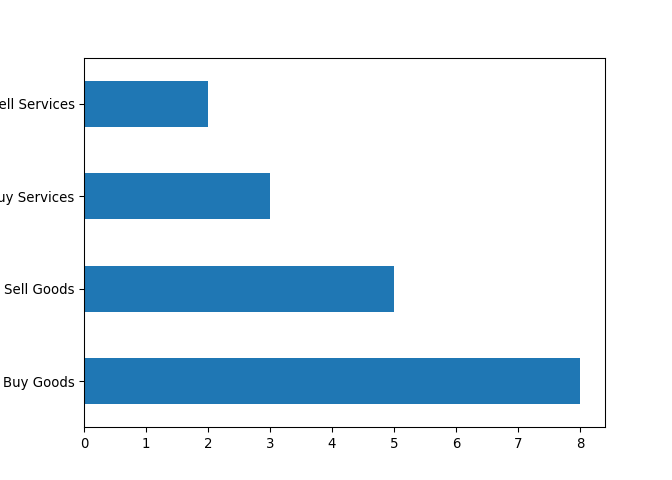

In [ ]:
df["type"].value_counts().plot.barh()

*What if we want the count for just goods and services regardless of
whether bought or sold?*

In [ ]:
df["type"].str.split(expand=True)[0].value_counts()

Buy     11
Sell     7
Name: 0, dtype: int64

*How do we address the above question using `groupby` (which is a more
general way of answering segmentation related questions)?*

In [ ]:
df.groupby(["type"]).size()

type
Buy Goods        8
Buy Services     3
Sell Goods       5
Sell Services    2
dtype: int64

Exploring `DataFrameGroupBy` object

In [ ]:
m = df.groupby(["type"])
m.ngroups # how many groups

4

{'Buy Goods': [1, 3, 4, 6, 8, 13, 15, 16], 'Buy Services': [5, 7, 14], 'Sell Goods': [2, 9, 10, 12, 17], 'Sell Services': [0, 11]}

[('Buy Goods',                                      id       date       type  ... total_cost quantity  unit_price
1            0000017.2020225.BG.Gra.120 2020-02-25  Buy Goods  ...        120      1.0       120.0
3      0000015.2020525.BG.cchChiPep.300 2020-05-25  Buy Goods  ...        300      3.0       100.0
4            0000014.2020525.BG.Pet.200 2020-05-25  Buy Goods  ...        200     10.0        20.0
6   0000012.2020316.BG.bbeBelPepGre.220 2020-03-16  Buy Goods  ...        220      1.0       220.0
8             0000009.2020524.BG.Ban.50 2020-05-24  Buy Goods  ...         50      NaN         NaN
13          0000005.2020115.BG.Oth.1000 2020-01-15  Buy Goods  ...       1000      NaN         NaN
15           0000003.2020415.BG.Oth.200 2020-04-15  Buy Goods  ...        200      2.0       100.0
16           0000002.2020515.BG.Pet.100 2020-05-15  Buy Goods  ...        100      NaN         NaN

[8 rows x 8 columns]), ('Buy Services',                                      id       date   

Essentially a `groupby` is having filtered data for each of the groups.
`Groupby` just splits the data, however, we can apply some
aggregation/summarization or function to the grouped data. Consider the
question below:

*What is the total cost related to each transaction type?*

In [ ]:
df.groupby(["type"])["total_cost"].sum()

type
Buy Goods        2190
Buy Services     1400
Sell Goods       2900
Sell Services     320
Name: total_cost, dtype: int64

*Using the immediate result, establish if there is revenue gain or
loss.*

In [ ]:
type_cost = df.groupby(["type"])["total_cost"].sum()
goods = type_cost["Sell Goods"] - type_cost["Buy Goods"]
services = type_cost["Sell Services"] - type_cost["Buy Services"]
goods + services

-370

The result above is same as below. We have a loss since the cost is more
than amount generated from the farm (thus negative revenue).

In [ ]:
type_cost.filter(like="Sell").sum() - type_cost.filter(like="Buy").sum()

-370

If we want to use multiple summary function on a `groupby` object, we
can do so via `agg()` method. The two code lines below produce the same
result.

In [ ]:
df.groupby(["type"]).agg({"total_cost": ["mean", "sum"]})

               total_cost      
                     mean   sum
type                           
Buy Goods      273.750000  2190
Buy Services   466.666667  1400
Sell Goods     580.000000  2900
Sell Services  160.000000   320

                     mean   sum
type                           
Buy Goods      273.750000  2190
Buy Services   466.666667  1400
Sell Goods     580.000000  2900
Sell Services  160.000000   320

*Find the record(s) related to most expensive transaction.*

In [ ]:
df[df.total_cost == df.total_cost.max()]

                             id       date        type  ... total_cost quantity  unit_price
10  0000007.2020515.SG.Oth.1000 2020-05-15  Sell Goods  ...       1000      NaN         NaN
13  0000005.2020115.BG.Oth.1000 2020-01-15   Buy Goods  ...       1000      NaN         NaN

[2 rows x 8 columns]

         date   item                  category  total_cost
10 2020-05-15  Other  Herbicide (or Weedicide)        1000
13 2020-01-15  Other       Equipment (or Tool)        1000